# CIVL 4100R Project 1 (25 points)

**Due date: 11:59 pm 29 March**

### Data
This dataset is about building thermal environment and occupants' feedback. There are six fields in this dataset:
- Season: Season measurement was made [summer, winter, hot/wet, cool/dry]. Note: based on the following assumptions when timestamp and location are known: northern hemisphere latitudes <20 are hot/wet from May-Oct and cool/dry from Nov-Apr; northern hemisphere latitudes >=20 are summer May-Oct and winter from Nov-Apr; vice versa for Southern Hemisphere
- Age: Age of subject [years].
- Gender: ender of subject [female, male]
- ta: Air temperature measured in the occupied zone [°C]
- rh: Relative humidity [%]
- thermal_preference: Thermal preference [cooler, no change, warmer]


### Objective
Develop models to predict the thermal preference, i.e. whether the occupants prefer the indoor environment to cooler, warmer, or no change.
Your model can help our building operator to better control the air conditioner for a more comfortable and productive indoor environment.


### Instructions
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.

### Submission
- Submit your **.ipynb file** in CANVAS.
- Rename the file with your **Full Name and Student ID**.
- You do NOT need submit a seperate report for **this** project.

-----------

### Q1: Data visualization (5 points)
* Conduct an exploratory data analysis to visualize this dataset.
* The goal is to have a rough idea about the impacts of different factors on occupants' thermal preference.
* Can submit more than one plotting.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


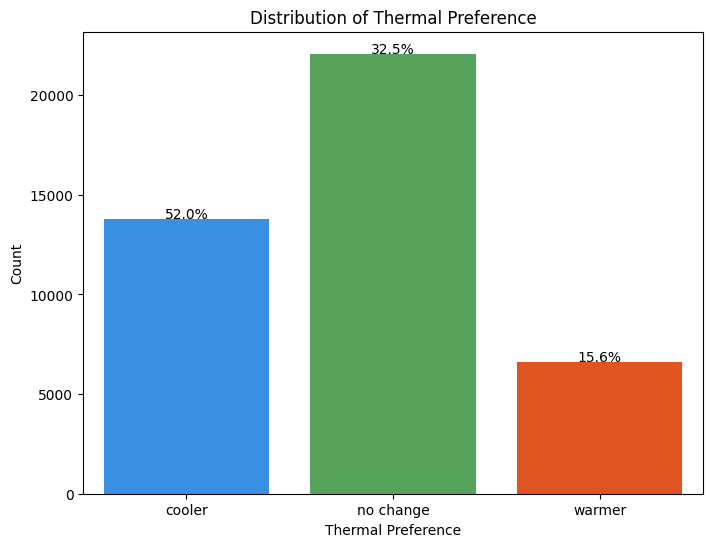

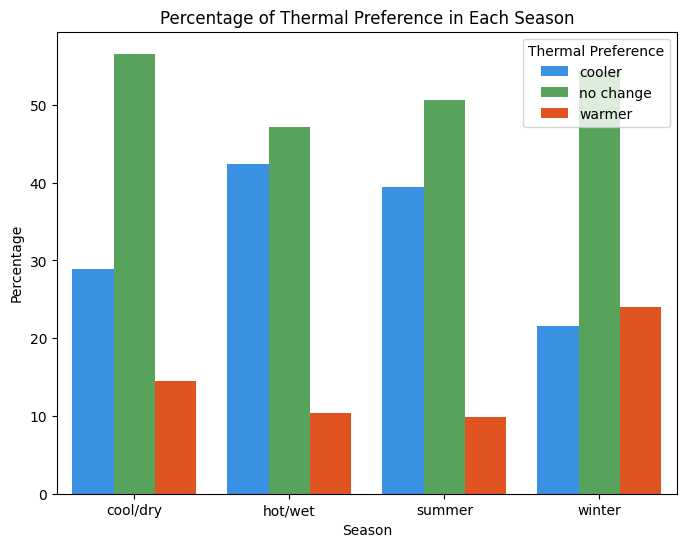

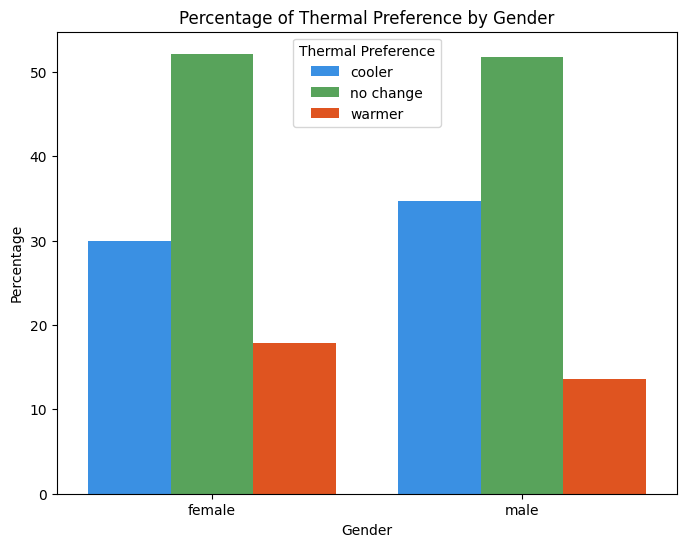

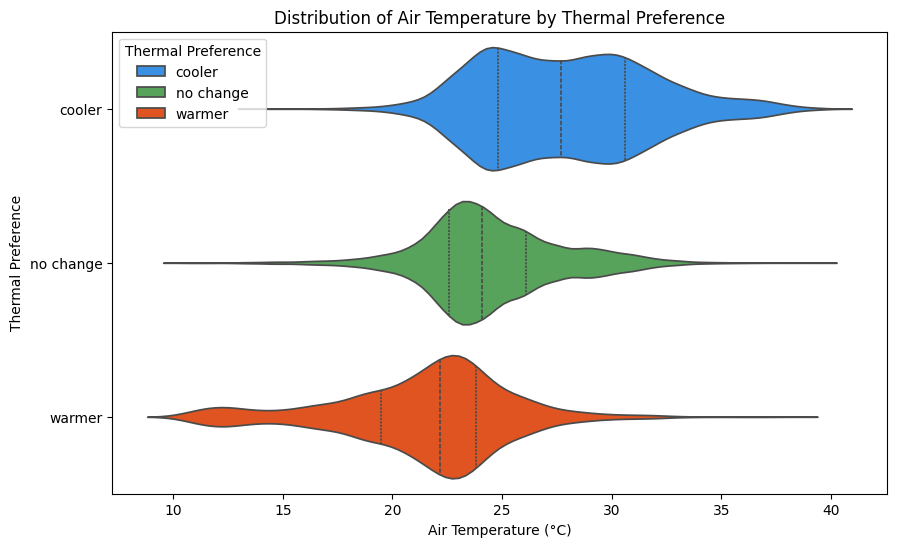

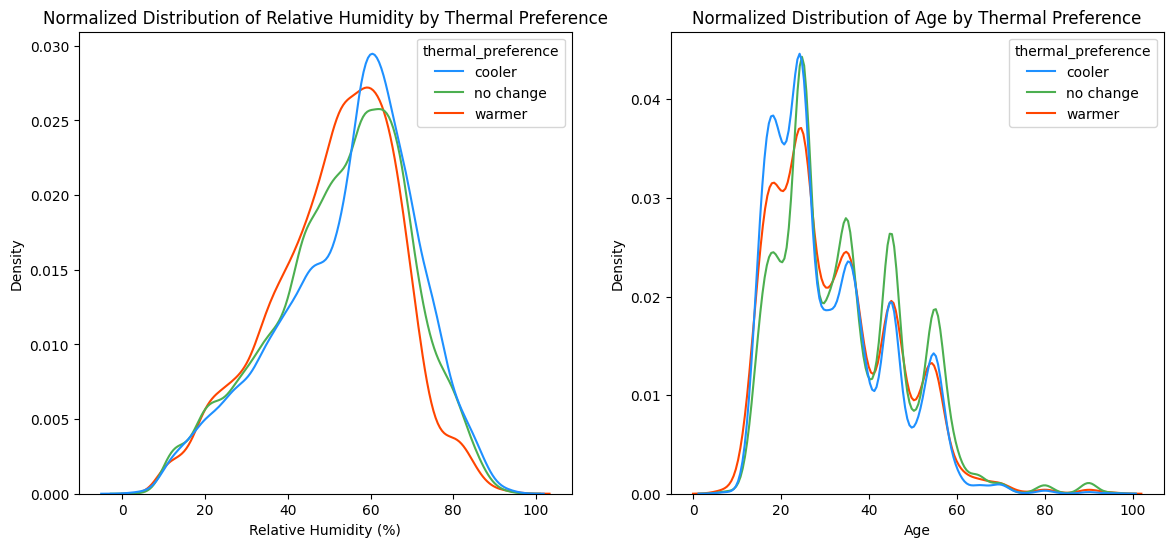

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import exists

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Check if the file exists in Google Drive
file_path = '/content/drive/My Drive/thermal_comfort.csv'
if exists(file_path):
    # File exists, now you can read it or perform other operations
    data = pd.read_csv(file_path)
else:
    print("File does not exist.")

# Define a custom color palette
custom_palette = {'warmer': 'orangered', 'no change': '#4CAF50', 'cooler': 'dodgerblue'}

# Plotting for thermal preference distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='thermal_preference',
                   hue='thermal_preference', data=data, palette=custom_palette, legend=False)
total_count = data.shape[0]
percentages = (data['thermal_preference'].value_counts() / total_count) * 100
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{percentages[i]:.1f}%', ha='center')
plt.title('Distribution of Thermal Preference')
plt.xlabel('Thermal Preference')
plt.ylabel('Count')


# Plotting percentage of thermal preference in each season
data_s = data[(data['season'] != 'autumn') & (data['season'] != 'spring')]
season_preference_counts = data_s.groupby(['season', 'thermal_preference']).size().reset_index(name='count')
season_totals = season_preference_counts.groupby('season')['count'].transform('sum')
season_preference_counts['percentage'] = (season_preference_counts['count'] / season_totals) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='percentage', hue='thermal_preference', data=season_preference_counts, palette=custom_palette)
plt.title('Percentage of Thermal Preference in Each Season')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend(title='Thermal Preference')
plt.show()

# Plotting percentage of thermal preference depending on gender
gender_preference_counts = data.groupby(['gender', 'thermal_preference']).size().reset_index(name='count')
gender_totals = gender_preference_counts.groupby('gender')['count'].transform('sum')
gender_preference_counts['percentage'] = (gender_preference_counts['count'] / gender_totals) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='percentage', hue='thermal_preference', data=gender_preference_counts, palette=custom_palette)
plt.title('Percentage of Thermal Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Thermal Preference')
plt.show()

# Plot for thermal preference relative to air temperature
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='thermal_preference', x='ta', hue='thermal_preference',
               palette=custom_palette, inner='quartile', legend=True)
plt.title('Distribution of Air Temperature by Thermal Preference')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Thermal Preference')
plt.gca().legend(loc='upper left', title='Thermal Preference')
plt.show()

# Create a figure with two subplots side by side for RH and Age
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting for Relative humidity (RH)
sns.kdeplot(data=data, x='rh', hue='thermal_preference', ax=axes[0],
            palette=custom_palette, fill=False, common_norm=False, legend=True)
axes[0].set_title('Normalized Distribution of Relative Humidity by Thermal Preference')
axes[0].set_xlabel('Relative Humidity (%)')
axes[0].set_ylabel('Density')

# Plotting for Age
sns.kdeplot(data=data, x='age', hue='thermal_preference', ax=axes[1],
            palette=custom_palette, fill=False, common_norm=False, legend=True)
axes[1].set_title('Normalized Distribution of Age by Thermal Preference')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

plt.show()


### Q2: Logistic regression (7 points)
* Develop a logistic regression model to predict occupants' thermal preference

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset (assuming 'data' is your DataFrame)
# Ensure that the dataset is prepared, with features and target variable properly encoded
# For example, encode categorical variables using LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['season'] = le.fit_transform(data['season'])
data['thermal_preference'] = le.fit_transform(data['thermal_preference'])

# Split the data into features (X) and target variable (y)
X = data.drop(['thermal_preference'], axis=1)
y = data['thermal_preference']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.51      0.59      2841
           1       0.60      0.84      0.70      4329
           2       0.69      0.21      0.32      1329

    accuracy                           0.63      8499
   macro avg       0.66      0.52      0.54      8499
weighted avg       0.65      0.63      0.60      8499



Report **accuracy** here:


In [57]:
from sklearn.metrics import accuracy_score
# Calculate accuracy on the training dataset
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Calculate accuracy on the test dataset
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Accuracy on the training dataset:", train_accuracy)
print("Accuracy on the test dataset:", test_accuracy)

Accuracy on the training dataset: 0.6262869918220862
Accuracy on the test dataset: 0.629838804565243


### Q3: Decision Tree (7 points)
* Develop a Decision Tree model to predict occupants' thermal preference.
* Requirements: please apply the hyper-parameter tuning methods you've learned to improve the model accuracy

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Decision Tree model
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# step 3 Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    # 'max_leaf_nodes': [None, 5, 10, 20]
}

# step 4 : Perform Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5 : Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Step 6: Evaluate the model's performance on the testing data
test_accuracy = best_dt_classifier.score(X_test, y_test)

# Step 7: Display results
print("Best Parameters:", best_params)
print("Accuracy on the test dataset:", test_accuracy)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy on the test dataset: 0.6201906106600776


Report **accuracy** here:


In [59]:
# Calculate accuracy on the training dataset
train_accuracy = best_dt_classifier.score(X_train, y_train)
print("Accuracy on the training dataset:", train_accuracy)
print("Accuracy on the test dataset:", test_accuracy)

Accuracy on the training dataset: 0.658704477260693
Accuracy on the test dataset: 0.6201906106600776


### Q4: Feature importance (3 points)
* Analyze which features are more important to determine occupants' thermal preference?
* You can use plotting to prove your conclusion.

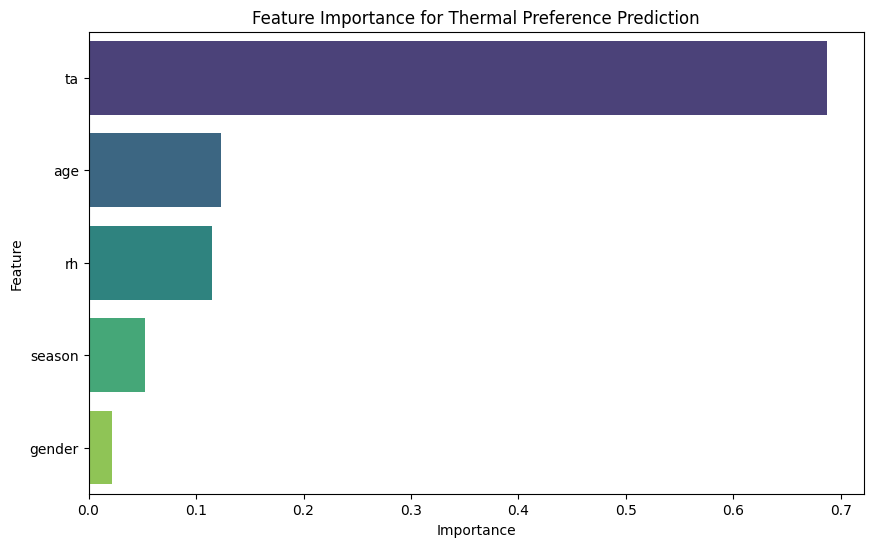

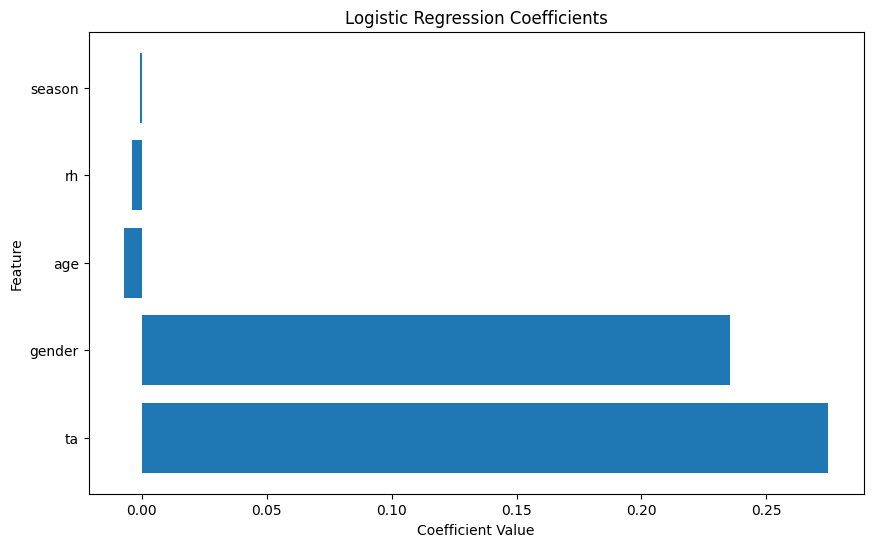

In [60]:
# Assuming 'best_dt_classifier' is your trained Decision Tree classifier
feature_importance = best_dt_classifier.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Feature Importance for Thermal Preference Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Get feature names
feature_names = X.columns

# Get coefficients and their absolute values
coefficients = model.coef_[0]
absolute_coefficients = abs(coefficients)

# Sort feature names based on absolute coefficient values
sorted_indices = absolute_coefficients.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

**In both the decision tree and logistic regression models, the air temperature emerges as the standout influential factor regarding thermal preference. Its significance is evident, suggesting that variations in air temperature have the most substantial impact on individuals' thermal comfort.**

**However, the interpretation diverges when considering gender. While it plays a pivotal role in the logistic regression model, ranking as the second most influential factor, its relevance diminishes significantly in the decision tree model, positioning it as the least significant factor. This discrepancy implies that gender's impact on thermal preference is more nuanced and possibly intertwined with other variables in the logistic regression model.**

**Contrastingly, the season and relative humidity (rh) exhibit minimal importance in both models. These factors seemingly contribute little to discerning thermal preference, implying that variations in seasons or humidity levels have limited influence compared to other environmental factors like air temperature.**

### Q5: Model comparison (3 points)
* Compare the Logistic regression and randome forest model

Accuracy_RFM: 0.6344275797152606

Classification Report RFM :
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      2841
           1       0.64      0.73      0.68      4329
           2       0.53      0.40      0.45      1329

    accuracy                           0.63      8499
   macro avg       0.61      0.58      0.59      8499
weighted avg       0.63      0.63      0.63      8499

Accuracy_LR 0.629838804565243

Classification Report LR :
              precision    recall  f1-score   support

           0       0.69      0.51      0.59      2841
           1       0.60      0.84      0.70      4329
           2       0.69      0.21      0.32      1329

    accuracy                           0.63      8499
   macro avg       0.66      0.52      0.54      8499
weighted avg       0.65      0.63      0.60      8499



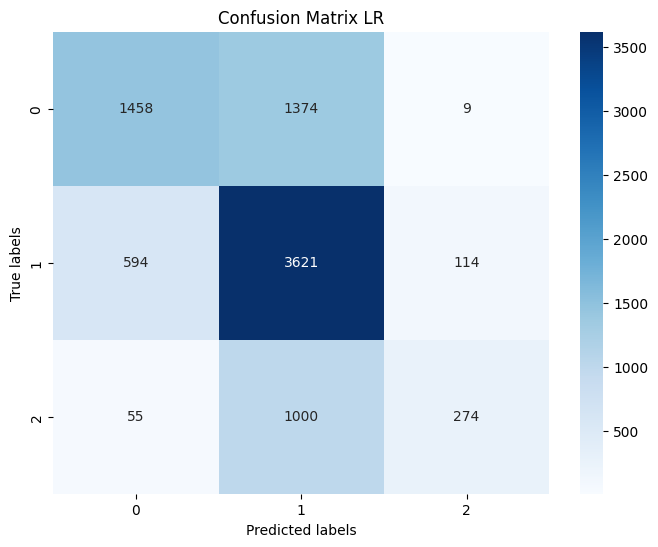

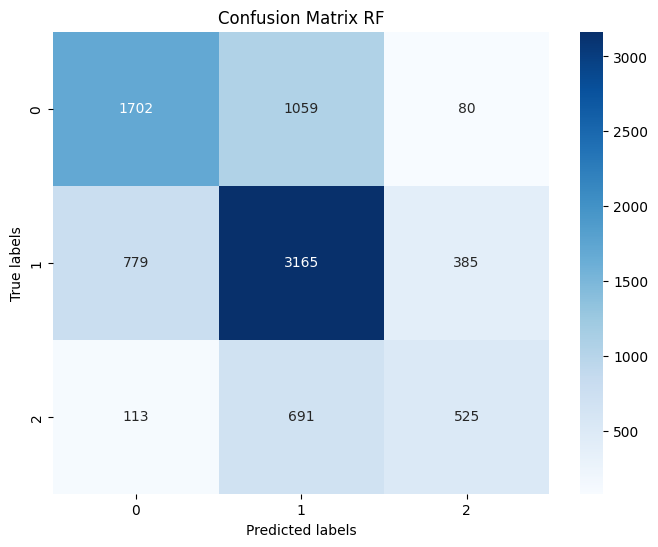

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy_RFM:", accuracy)
print("\nClassification Report RFM :")
print(classification_report(y_test, y_pred_rf))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print("Accuracy_LR", test_accuracy)
print("\nClassification Report LR :")
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred)


# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)



# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix LR')
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix RF')
plt.show()


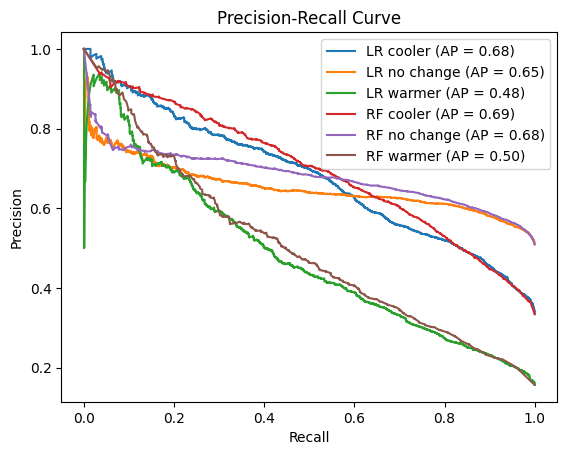

In [62]:
# Mapping integer labels to string labels
class_mapping = {0: 'cooler', 1: 'no change', 2: 'warmer'}

# Precision-Recall Curve for Logistic Regression
precision_lr = dict()
recall_lr = dict()
average_precision_lr = dict()
for i in range(len(le.classes_)):
    precision_lr[i], recall_lr[i], _ = precision_recall_curve((y_test == i).astype(int), model.predict_proba(X_test)[:, i])
    average_precision_lr[i] = average_precision_score((y_test == i).astype(int), model.predict_proba(X_test)[:, i])
    plt.plot(recall_lr[i], precision_lr[i], label='LR {} (AP = {:0.2f})'.format(class_mapping[i], average_precision_lr[i]))

# Precision-Recall Curve for Random Forest
precision_rf = dict()
recall_rf = dict()
average_precision_rf = dict()
for i in range(len(le.classes_)):
    precision_rf[i], recall_rf[i], _ = precision_recall_curve((y_test == i).astype(int), rf_model.predict_proba(X_test)[:, i])
    average_precision_rf[i] = average_precision_score((y_test == i).astype(int), rf_model.predict_proba(X_test)[:, i])
    plt.plot(recall_rf[i], precision_rf[i], label='RF {} (AP = {:0.2f})'.format(class_mapping[i], average_precision_rf[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()




After a comprehensive examination of the evaluation metrics, including the analysis of confusion matrices and precision-recall curves, it becomes evident that the random forest model demonstrates a slight edge in performance over the logistic regression model. This conclusion is derived from an assessment of various performance indicators, affirming the random forest's slight superiority in effectively capturing the underlying patterns within the data.